In [1]:

import pandas as pd
import numpy as numpy
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix
import datetime as dt
from sklearn.cluster import KMeans
import random

In [2]:
train_data=pd.read_csv('C:\\Users\\SHIVANSHU SRIVASTAVA\\OneDrive\\Desktop\\onlinne_retail recomendation system\\online-retail-recomendation-system-\\clean_data.csv')

In [3]:
train_data.columns

Index(['Unnamed: 0', 'ID', 'ProdID', 'Rating', 'ReviewCount', 'Category',
       'Brand', 'Name', 'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [4]:
train_data.head()

,Unnamed: 0,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,0,1705736792,2,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"premium, beauty, premium, makeup, premium, nai..."
1,1,95,76,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,2,8,8,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,3,4,3,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,4,990,3,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [5]:
train_data.shape

(4090, 11)

In [6]:
train_data.isnull().sum()

Unnamed: 0       0
ID               0
ProdID           0
Rating           0
ReviewCount      0
Category         9
Brand           96
Name             0
ImageURL         0
Description    916
Tags             0
dtype: int64

In [7]:
# claen brand 
#train_data['Brand'].isnull().sum()
train_data['Brand'].fillna('unknown', inplace=True)
# fill desription also 
#train_data['Description'].isnull().sum()
train_data['Description'].fillna('unknown', inplace=True)

# for category ALSO 
#train_data['Category'].isnull().sum()
train_data['Category'].fillna('unknown', inplace=True)  

C:\Users\SHIVANSHU SRIVASTAVA\AppData\Local\Temp\ipykernel_23124\267849539.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Brand'].fillna('unknown', inplace=True)
C:\Users\SHIVANSHU SRIVASTAVA\AppData\Local\Temp\ipykernel_23124\267849539.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [8]:
train_data.isnull().sum()

Unnamed: 0     0
ID             0
ProdID         0
Rating         0
ReviewCount    0
Category       0
Brand          0
Name           0
ImageURL       0
Description    0
Tags           0
dtype: int64

In [9]:
#check for duplicates
train_data.duplicated().sum()

np.int64(0)

In [10]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [11]:
train_data

,Unnamed: 0,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,0,1705736792,2,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,unknown,"premium, beauty, premium, makeup, premium, nai..."
1,1,95,76,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,2,8,8,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,3,4,3,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,4,990,3,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."
...,...,...,...,...,...,...,...,...,...,...,...
4085,4991,1,1245,0.0,0.0,"personal, care, incontinence, incontinence",livdry,LivDry Incontinence Pad Insert for Men and Wom...,https://i5.walmartimages.com/asr/d1011e6e-9db0...,"livdry, pads, better, competitors, easy, careg...","personal, care, incontinence, incontinence, li..."
4086,4992,338063,9,0.0,43.0,"pets, dogs, dog, apparel, dog, apparel, dog, s...","unique, bargains",Pet Dog Cat Warm Coat Knit Sweater Winter Clot...,https://i5.walmartimages.com/asr/05383e03-66b3...,"features, 100, brand, new, high, quality, soft...","pets, dogs, dog, apparel, dog, apparel, dog, s..."
4087,4993,449,435,0.0,0.0,"health, aromatherapy, aromatherapy","pure, gold","Pure Gold Bitter Orange Essential Oil, 100% Na...",https://i5.walmartimages.com/asr/1a13e309-149b...,"60ml, bottle, pure, gold, bitter, orange, esse...","health, aromatherapy, aromatherapy, pure, gold..."
4088,4995,2771,208,4.5,2.0,"household, essentials, air, fresheners, spray,...","eclectic, lady","Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"garden, mint, lovely, blend, spearmint, lettuc...","household, essentials, air, fresheners, spray,..."


In [12]:
# Ensure 'ID' column is numeric

train_data['ID'] = train_data['ID'].astype(str)  # Convert to string first
train_data['ID'] = pd.to_numeric(train_data['ID'], errors='coerce')


train_data['ProdID'] = train_data['ProdID'].astype(float)  


In [13]:
train_data

,Unnamed: 0,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,0,1705736792,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,unknown,"premium, beauty, premium, makeup, premium, nai..."
1,1,95,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,2,8,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,3,4,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,4,990,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."
...,...,...,...,...,...,...,...,...,...,...,...
4085,4991,1,1245.0,0.0,0.0,"personal, care, incontinence, incontinence",livdry,LivDry Incontinence Pad Insert for Men and Wom...,https://i5.walmartimages.com/asr/d1011e6e-9db0...,"livdry, pads, better, competitors, easy, careg...","personal, care, incontinence, incontinence, li..."
4086,4992,338063,9.0,0.0,43.0,"pets, dogs, dog, apparel, dog, apparel, dog, s...","unique, bargains",Pet Dog Cat Warm Coat Knit Sweater Winter Clot...,https://i5.walmartimages.com/asr/05383e03-66b3...,"features, 100, brand, new, high, quality, soft...","pets, dogs, dog, apparel, dog, apparel, dog, s..."
4087,4993,449,435.0,0.0,0.0,"health, aromatherapy, aromatherapy","pure, gold","Pure Gold Bitter Orange Essential Oil, 100% Na...",https://i5.walmartimages.com/asr/1a13e309-149b...,"60ml, bottle, pure, gold, bitter, orange, esse...","health, aromatherapy, aromatherapy, pure, gold..."
4088,4995,2771,208.0,4.5,2.0,"household, essentials, air, fresheners, spray,...","eclectic, lady","Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"garden, mint, lovely, blend, spearmint, lettuc...","household, essentials, air, fresheners, spray,..."


# EDA (Exploratory data analysis)

In [14]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1666
Number of unique items: 1607
Number of unique ratings: 36


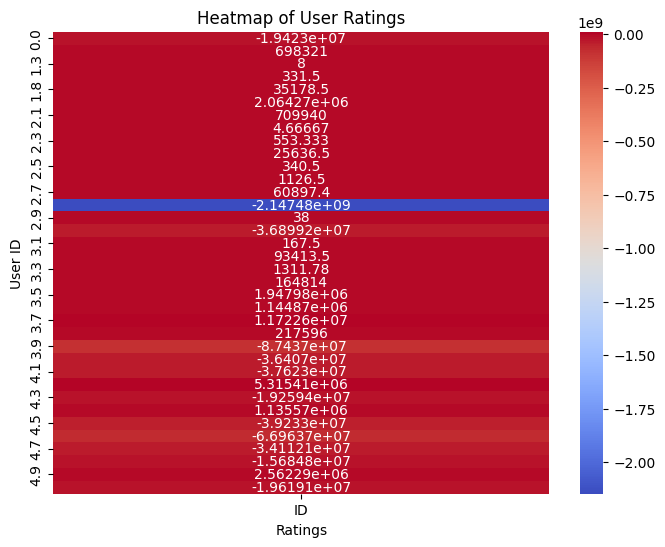

In [15]:
# heat map of ratings

# Pivot the DataFrame to create a heatmap
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

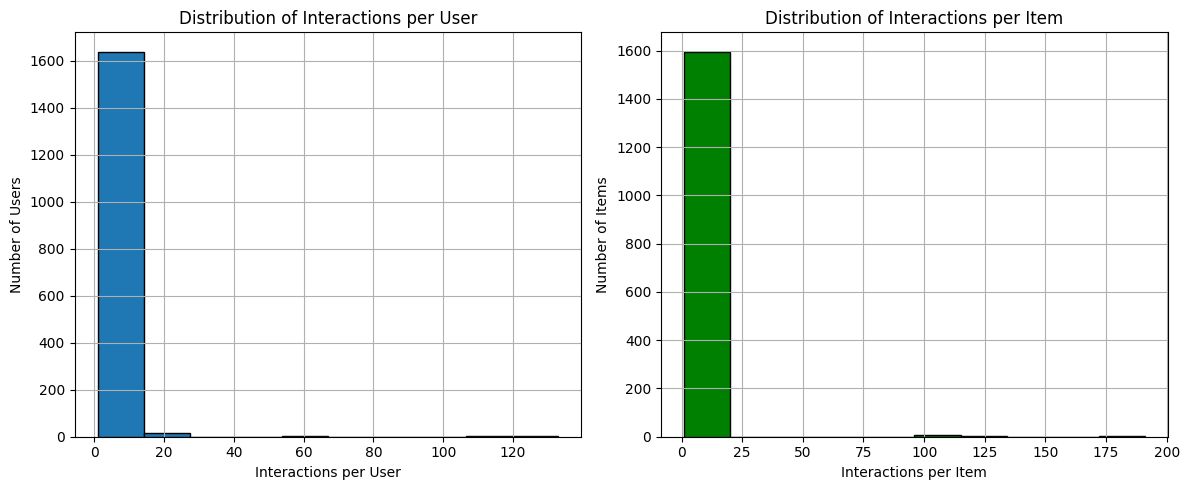

In [16]:
# Distribution of interactions
# ek user ka interaction kaise hai


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

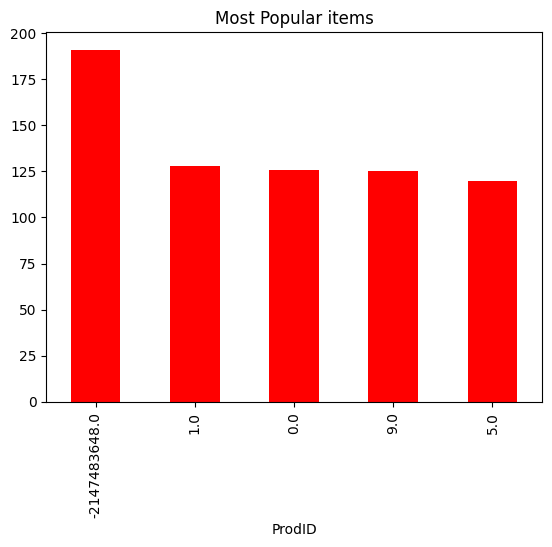

In [17]:
# Most popular items

 # top 5 item jinhe user nai purchae kiya h 

popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

Text(0.5, 1.0, 'Most Rated Count')

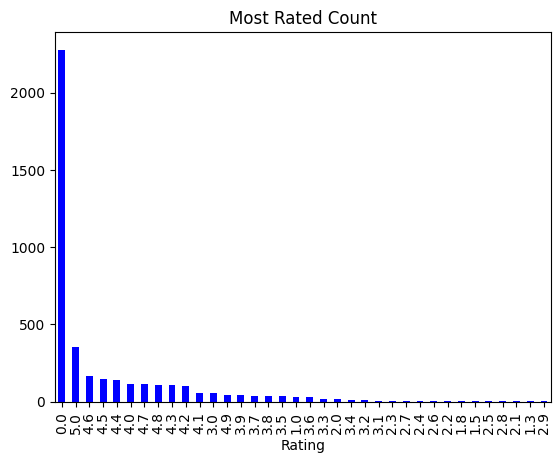

In [18]:
# most rated  count 

train_data['Rating'].value_counts().plot(kind='bar', color='blue')
plt.title("Most Rated Count")


# step 3: data cleaning and tags creation 

In [20]:
# spacy provides a powerful NLP library for text processing
#  sentimental analysis 
# spacy provide a english model for text processing like sentiment analysis, tokenization, etc.
# %pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#Download the model if not already present
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [21]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

# rating base recomendation system

In [22]:

average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [30]:
# top_rated_items=average_ratings.sort_values(by='Rating', ascending=False, inplace=True)
# # shwing top 5 items
# rating= average_ratings.head(5)   



top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [31]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)

C:\Users\SHIVANSHU SRIVASTAVA\AppData\Local\Temp\ipykernel_23124\565725879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
C:\Users\SHIVANSHU SRIVASTAVA\AppData\Local\Temp\ipykernel_23124\565725879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [32]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


C:\Users\SHIVANSHU SRIVASTAVA\AppData\Local\Temp\ipykernel_23124\393183274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
1227,DermOrganic Intensive Hair Repair Masque 33.8 Oz,3,dermorganic,https://i5.walmartimages.com/asr/3c14a936-2b0f...,5
2467,"NOW Essential Oils, Organic Orange Oil, Uplift...",2,foods,https://i5.walmartimages.com/asr/f90812a8-fed2...,5
824,COSRX Ultimate Moisturizing Honey Overnight Fa...,2,cosrx,https://i5.walmartimages.com/asr/5b70eab0-99eb...,5
892,Cantu Shea Butter for Natural Hair Conditionin...,4,cantu,https://i5.walmartimages.com/asr/819308b6-39c0...,5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5
14,($33 Value) Sol De Janeiro Carnaval Shimmer Gi...,2,"sol, de, janeiro",https://i5.walmartimages.com/asr/433fca9d-d5c2...,5
10,($206 Value) Peter Thomas Roth Face Mask Frenz...,1,"peter, thomas, roth",https://i5.walmartimages.com/asr/f5fae452-5c37...,5
62,(2 Packs) Crest 4 In 1 Fluoride Anticavity Too...,1,crest,https://i5.walmartimages.com/asr/44ea137f-ab6d...,5
58,(2 Pack) Spring Valley Apple Cider Vinegar Cap...,2,"spring, valley",https://i5.walmartimages.com/asr/7b4c7801-3747...,5
1575,"Gaiam Kids Yoga Mat Pink Zebra, 4mm",13,gaiam,https://i5.walmartimages.com/asr/1e3a766f-4185...,5


# content base recomendation system (user preference or items ssimilarities )

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [35]:
cosine_similarities_content

array([[1.        , 0.00341271, 0.00356463, ..., 0.        , 0.        ,
        0.13216315],
       [0.00341271, 1.        , 0.38045609, ..., 0.01455516, 0.02802382,
        0.02331006],
       [0.00356463, 0.38045609, 1.        , ..., 0.0064001 , 0.01886776,
        0.04006887],
       ...,
       [0.        , 0.01455516, 0.0064001 , ..., 1.        , 0.        ,
        0.00321296],
       [0.        , 0.02802382, 0.01886776, ..., 0.        , 1.        ,
        0.0026141 ],
       [0.13216315, 0.02331006, 0.04006887, ..., 0.00321296, 0.0026141 ,
        1.        ]])

In [36]:
train_data['Name'][0]

'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

In [41]:
iten_name='OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index=train_data[train_data['Name'] == iten_name].index[0]

In [44]:
similar_items=list(enumerate(cosine_similarities_content[item_index]))# enumerates is used to get the index and value of the list

In [51]:
similar_items=sorted(similar_items, key=lambda x: x[1], reverse=True)# sort the list in descending order based on the value
top_similar_items=similar_items[1:11]  # get the top 10 similar items

recomended_items_indics=[x[0] for x in top_similar_items]

In [52]:
top_similar_items

[(183, np.float64(1.0000000000000002)),
 (203, np.float64(1.0000000000000002)),
 (234, np.float64(1.0000000000000002)),
 (318, np.float64(1.0000000000000002)),
 (366, np.float64(1.0000000000000002)),
 (392, np.float64(1.0000000000000002)),
 (671, np.float64(1.0000000000000002)),
 (820, np.float64(1.0000000000000002)),
 (952, np.float64(1.0000000000000002))]

In [ ]:
train_data.iloc[recomended_items_indics][['Name','ReviewCount','Brand']] # iloc is used to get the rows based on the index

,Name,ReviewCount,Brand
183,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
203,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
234,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
318,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
366,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
392,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
671,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
820,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi
952,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi


# function to recomend product for content base 

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [56]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
155,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
183,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
203,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
234,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
318,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
366,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
392,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
671,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [57]:

# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
2870,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
525,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
3371,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
3398,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1409,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2445,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3758,Be Matte Lipstick - Soft Pink,2.0,"city, color",https://i5.walmartimages.com/asr/69e1ec63-be5e...,3.0
1194,Be Matte Lipstick - Baby Pink,2.0,"city, color",https://i5.walmartimages.com/asr/acadf0c0-739f...,3.0
